In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

%matplotlib inline

Pandas yardımıyla dosyayı okudum.

In [2]:
jury = pd.read_csv("jury.csv")

In [3]:
df = jury.copy()

Zaten veride ne olduğunu biliyorum fakat kontrol amaçlı ilk 5 gözlem birimine baktım.

In [4]:
df.head()

,race
0,white
1,white
2,white
3,white
4,white


In [5]:
df.isna().any()

race    False
dtype: bool

Boş veriyle mücadeleye girmeye de gerek olmadığını gördük.

Bir "one-way table" oluşturmak için Pandas'ın nimetlerinden faydalandım.

In [6]:
one_way_table = pd.crosstab(index=df["race"], columns="count")

In [7]:
one_way_table

col_0,count
race,
black,26
hispanic,25
other,19
white,205


In [8]:
one_way_table.T

race,black,hispanic,other,white
col_0,,,,
count,26,25,19,205


In [9]:
import dataframe_image as dfi

In [10]:
dfi.export(one_way_table.T, "one_way_table_transposed_full.png")

In [11]:
df.value_counts().sum()

275

In [12]:
e_white = df.value_counts().sum() * .72
e_other = df.value_counts().sum() * .09
e_hispanic = df.value_counts().sum() * .12
e_black = df.value_counts().sum() * .07

In [13]:
one_way_table["expected"] = [e_black, e_hispanic, e_other, e_white]

In [14]:
one_way_table.T

race,black,hispanic,other,white
col_0,,,,
count,26.00,25.0,19.00,205.0
expected,19.25,33.0,24.75,198.0


In [15]:
one_way_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, black to white
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   count     4 non-null      int64  
 1   expected  4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 268.0+ bytes


In [16]:
one_way_table

col_0,count,expected
race,,
black,26,19.25
hispanic,25,33.00
other,19,24.75
white,205,198.00


In [17]:
stacked = one_way_table.stack().reset_index().rename(columns={0: "value"})

In [18]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

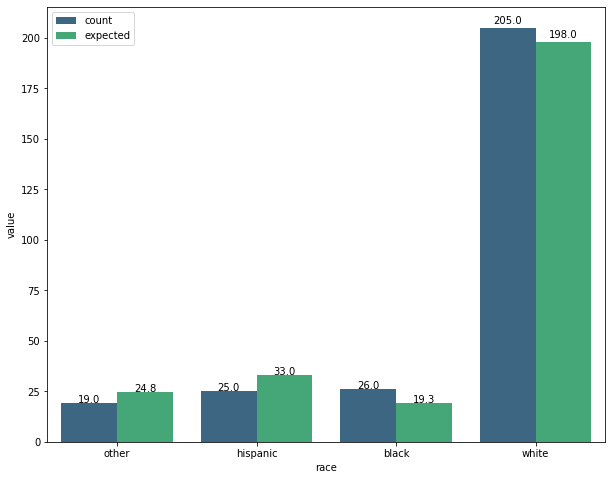

In [19]:
plt.figure(figsize=(10,8))

g = sns.barplot(x=stacked.race, y=stacked.value, hue=stacked.col_0, 
                 order=["other", "hispanic", "black", "white"], palette="viridis")
g.legend(loc="upper left")
show_values(g)

In [20]:
stacked

,race,col_0,value
0,black,count,26.00
1,black,expected,19.25
2,hispanic,count,25.00
3,hispanic,expected,33.00
4,other,count,19.00
5,other,expected,24.75
6,white,count,205.00
7,white,expected,198.00


In [21]:
import scipy.stats as stats

In [22]:
one_way_table

col_0,count,expected
race,,
black,26,19.25
hispanic,25,33.00
other,19,24.75
white,205,198.00


In [23]:
chi_sq, p_value = stats.chisquare(f_obs = one_way_table["count"], f_exp = one_way_table["expected"])
print('Test statistic=%.3f, p=%.3f' % (chi_sq, p_value))

Test statistic=5.890, p=0.117


In [24]:
diabetes = pd.read_csv("diabetes2.csv")

In [25]:
df = diabetes.copy()

In [26]:
df.head()

,treatment,outcome
0,met,success
1,rosi,failure
2,rosi,success
3,lifestyle,success
4,met,success


In [27]:
two_way_table = pd.crosstab(df["outcome"], df["treatment"], margins=True)

In [28]:
two_way_table

treatment,lifestyle,met,rosi,All
outcome,,,,
failure,109,120,90,319
success,125,112,143,380
All,234,232,233,699


In [29]:
stacked_two_way = two_way_table.stack().reset_index().rename(columns={0: "value"})

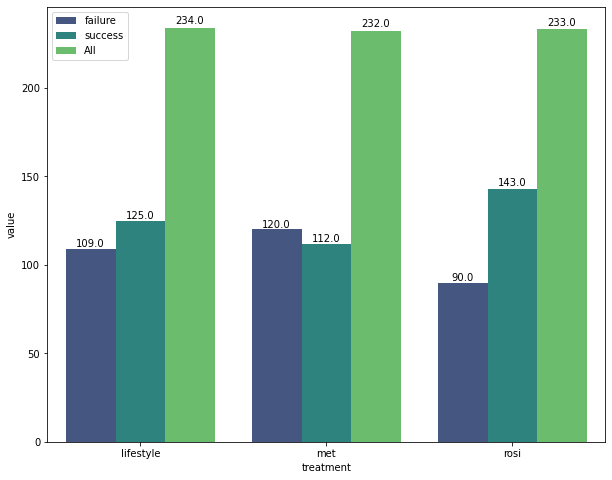

In [30]:
plt.figure(figsize=(10,8))

g = sns.barplot(x=stacked_two_way.treatment, y=stacked_two_way.value, hue=stacked_two_way.outcome, 
                 order=["lifestyle", "met", "rosi"], palette="viridis")
g.legend(loc="upper left")
show_values(g)

In [31]:
stacked_two_way_dropped = stacked_two_way.drop(stacked_two_way[stacked_two_way["outcome"] == "All"].index)

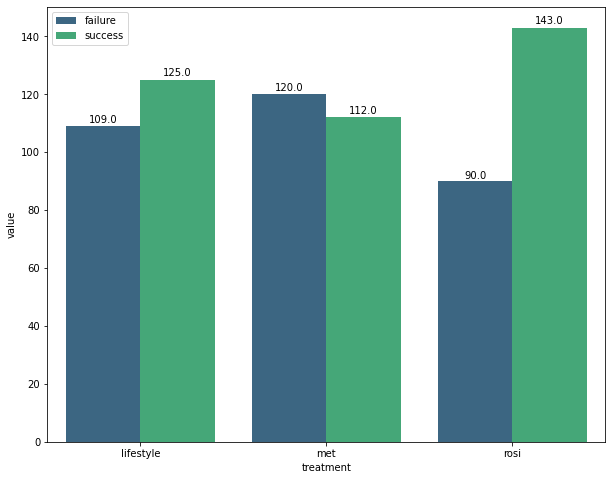

In [32]:
plt.figure(figsize=(10,8))

g = sns.barplot(x=stacked_two_way_dropped.treatment, y=stacked_two_way_dropped.value, hue=stacked_two_way_dropped.outcome, 
                 order=["lifestyle", "met", "rosi"], palette="viridis")
g.legend(loc="upper left")
show_values(g)

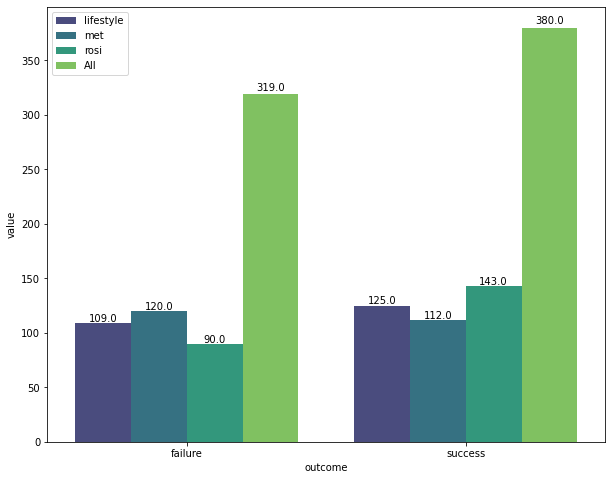

In [33]:
plt.figure(figsize=(10,8))

g = sns.barplot(x=stacked_two_way_dropped.outcome, y=stacked_two_way_dropped.value, hue=stacked_two_way_dropped.treatment,
                palette="viridis")
g.legend(loc="upper left")
show_values(g)

In [34]:
stacked_two_way_dropped = stacked_two_way_dropped.drop(stacked_two_way_dropped[stacked_two_way_dropped["treatment"] == "All"].index)

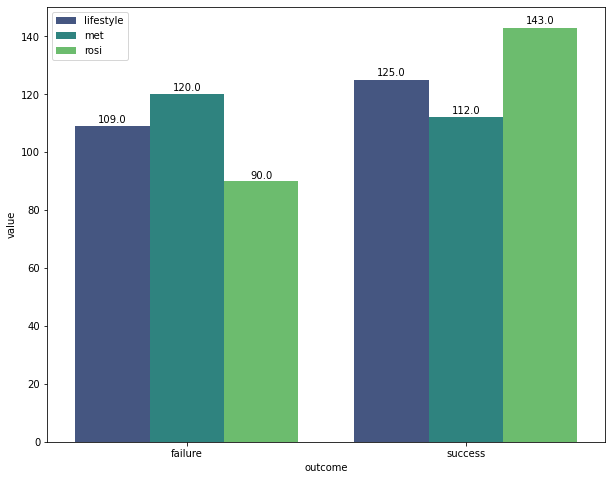

In [35]:
plt.figure(figsize=(10,8))

g = sns.barplot(x=stacked_two_way_dropped.outcome, y=stacked_two_way_dropped.value, hue=stacked_two_way_dropped.treatment,
                palette="viridis")
g.legend(loc="upper left")

show_values(g)

In [36]:
chi_table = pd.crosstab(df["treatment"], df["outcome"])
chi_table

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


In [37]:
stats.chi2_contingency(chi_table)

(8.164532108794889,
 0.0168691957929816,
 2,
 array([[106.78969957, 127.21030043],
        [105.8769671 , 126.1230329 ],
        [106.33333333, 126.66666667]]))